# Descriptive Statistics in Python


At its core, statistics is a branch of Mathematics that is about counting, measuring and interpreting data.

Merriam-Webster dictionary defines statistics as 
> "a branch of mathematics dealing with the collection, analysis, interpretation, and presentation of masses of numerical data"

Two main statistical methods are used in data analysis: 

1. Descriptive statistics: usually summarizes data from a sample using measures such as the mean or standard deviation

2. Inferential statistics: which draw conclusions from data that are subject to random variation (e.g., observational errors, sampling variation).

In this blogpost, I will cover descriptive statistics using python.

Descriptive statistics are are most often concerned with two sets of properties of a distribution of data, central tendency (or location) seeks to characterize the distribution's central or typical value, while dispersion (or variability) characterizes the extent to which members of the distribution depart from its center and each other.


## Averages and measures of central location

Measures of center are statistical numbers that give us a sense of the "middle" or "typical" of a numeric variable. Common measures of center include the mean, median and mode.

Below is a list of functions in python that can be used as measures of central locations using the [statistics module](https://docs.python.org/3/library/statistics.html).   

- mean( ): Arithmetic mean (“average”) of data.

- harmonic_mean( ): It is the reciprocal of the arithmetic mean of the reciprocals of the data (say for three numbers a,b and c, 1/mean = 3/(1/a + 1/b + 1/c))

- median( ): Median or middle value of data calculated as mean of middle two.When the number of data points is odd, the middle data point is returned. The median is a robust measure of central location, and is less affected by the presence of outliers in your data compared to the mean. 

- median_low( ):	Low median of data, when the number of data points is odd, the middle value is returned. When it is even, the smaller of the two middle values is returned

- median_high( ): High median of data.

- mode( ): Mode (most common value) of discrete data. The mode (when it exists) is the most typical value, and is a robust measure of central location.



In [21]:
# Importing relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [45]:
import statistics

myData = [1, 2, 3, 4, 6, 7, 8, 10, 10, 13, 15, 17, 18]

# Mean
print("mean = ", statistics.mean(myData))

# Harmonic Mean
print("Harmonic mean = ", statistics.harmonic_mean(myData))

# Median
print("median = ",statistics.median(myData))

# Mode
print("mode = ",statistics.mode(myData))


mean =  8.76923076923077
Harmonic mean =  4.368535030232963
median =  8
mode =  10


## Measures of spread

Measures of spread (dispersion) are statistics that describe how data varies, usually relative to the typical value. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

These following functions (from the statistics module in python) calculate a measure of how much the population or sample tends to deviate from the typical or average values.



- pvariance( ): Returns the population variance of data. Use this function to calculate the variance from the entire population. To estimate the variance from a sample, the variance( ) function is usually a better choice. When called with the entire population, this gives the population variance σ². When called on a sample instead, this is the biased sample variance s², also known as variance with N degrees of freedom.

- pstdev( ): Return the population standard deviation (the square root of the population variance)


- variance( ): Returns the sample variance of data, an iterable of at least two real-valued numbers. Variance, or second moment about the mean, is a measure of the variability (spread or dispersion) of data. A large variance indicates that the data is spread out; a small variance indicates it is clustered closely around the mean. If the optional second argument is given to the function, it should be the mean of data. This is the sample variance s² with Bessel’s correction, also known as variance with N-1 degrees of freedom. 

- stdev( ): Returns the sample standard deviation (the square root of the sample variance)




In [46]:

myData = [1, 2, 3, 4, 6, 7, 8, 10, 10, 13, 15, 17, 18]

# pvariance
print("pvariance = ", statistics.pvariance(myData))

# variance 
print("variance = ", statistics.variance(myData))

pvariance =  29.71597633136095
variance =  32.19230769230769


## Obtaining Descriptive Statistics on a Pandas Dataframe


[Download the titanics dataframe here](https://www.kaggle.com/c/titanic)

The following lines of code loads the data frame and peeks inside the first two rows of the data.

One simplest way of looking into the descriptive statistics of the data is using the .describe() method of pandas.


In [43]:
# Loading data and printing first few rows
titanic_DF = pd.read_csv('train.csv')

titanic_DF.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [44]:
# Previewing the statistics of training data and test data
titanic_DF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


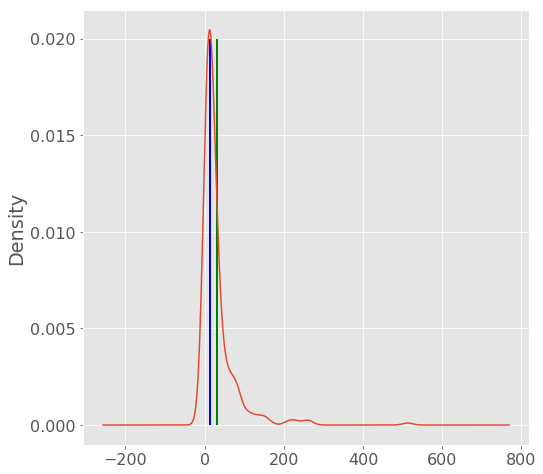

In [54]:
# Checking the difference between the mean and the median in non-symmetric data
norm_data = titanic_DF["Fare"]
norm_data.plot(kind="density",
              figsize=(8,8))


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.02,
           linewidth=2.0,
           color="green")

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.02, 
           linewidth=2.0,
           color="blue")

The plot shows that the median is a better indicator of the central tendency as compared to the mean. However for symmetric data (normal distribution) they could be identical.